In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/shivam9980/CNN-english-news/CNN_Articels_clean.csv")
df.shape

/Users/eshadatta/columbia_intro/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(37949, 11)

In [2]:
df.shape

(37949, 11)

In [3]:
df.to_csv("cnn_articles.csv", index=False)

In [4]:
news_categories = ["news", "politics", "business", "health"]
def create_super_category(category):
    super_category = None
    if category in news_categories:
        super_category = "News"
    elif category not in news_categories:
        super_category = "Entertainment"
    return super_category

def prepare_df(df):
    df["published_year"] = df["Date published"].apply(lambda x: x.split("-")[0])
    df['super_category'] = df.Category.apply(create_super_category)
    return df

df = prepare_df(df)
df.drop(columns=['Index'], inplace=True)

In [35]:
df.super_category.value_counts()

super_category
News             21949
Entertainment    16000
Name: count, dtype: int64

In [6]:
df.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,published_year,super_category
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",2021,News
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,2021,News
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021,News
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...,2022,News
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...,2022,News


In [178]:
print(df.loc[0].Headline)
print(df.loc[0]['Second headline'])
print(df.loc[0].Description)

There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN
There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed
The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?


In [ ]:
!pip install nltk

In [166]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = ["The sky is blue",'I love you', 'I hate you', 'The car is red', 'The car is green', "This car drives really fast. It's awesome, and I love it", "This car drives really slow, it's driving me crazy", 'Writing this in Java is way more verbose than in Python', "Java is terrible"]
for d in data:
    print(d)
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(d)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()


The sky is blue
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I love you
compound: 0.6369, neg: 0.0, neu: 0.192, pos: 0.808, 
I hate you
compound: -0.5719, neg: 0.787, neu: 0.213, pos: 0.0, 
The car is red
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The car is green
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This car drives really fast. It's awesome, and I love it
compound: 0.8612, neg: 0.0, neu: 0.483, pos: 0.517, 
This car drives really slow, it's driving me crazy
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
Writing this in Java is way more verbose than in Python
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Java is terrible
compound: -0.4767, neg: 0.608, neu: 0.392, pos: 0.0, 


In [9]:
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def get_sentiment(row):
    index = row.name
    if not pd.isnull(row['Article text']):
        txt = row['Article text']
    else:
        txt = ". ".join([row.Headline, row['Second headline'], row.Description])
    sentiment = None
    score = np.nan
    if txt: 
        try:
            ss = sid.polarity_scores(txt)
        except Exception as e:
            print(f"Problem with row id: {index}: {e}")
            print(txt)
        else:
            if ss['compound'] < 0.0:
                sentiment = "negative"
            elif ss['compound'] == 0.0:
                sentiment = "neutral"
            elif ss['compound'] > 0.0:
                sentiment = "positive"
            score = ss['compound']
    return score, sentiment

In [15]:
df[['nltk_vader_sentiment_score', 'nltk_vader_sentiment_type']] = df.apply(get_sentiment, axis = 1, result_type='expand')
df.to_csv("cnn_articles_sentiment_analysis", index=False)
df.head(10)

,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,published_year,super_category,nltk_vader_sentiment_score,nltk_vader_sentiment_type
0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",2021,News,0.9968,positive
1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,2021,News,0.9931,positive
2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021,News,0.9722,positive
3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...,2022,News,0.9997,positive
4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...,2022,News,0.9434,positive
5,"Chris Isidore, CNN Business",2022-03-20 11:36:43,business,investing,https://www.cnn.com/2022/03/20/investing/stock...,Stocks week ahead: Big Oil rakes in billions a...,"As crude prices surge, oil companies are rakin...","investing, Stocks week ahead: Big Oil rakes in...",Big Oil rakes in billions as prices soar. Lawm...,A version of this story first appeared in CNN ...,2022,News,0.9929,positive
6,"Matt Egan, CNN Business",2022-03-18 14:26:26,business,energy,https://www.cnn.com/2022/03/18/energy/oil-russ...,Oil 'emergency': Work from home and drive slow...,Governments around the world must consider dra...,"energy, Oil 'emergency': Work from home and dr...",Oil 'emergency': Work from home and drive slow...,New York (CNN Business)Governments around the ...,2022,News,-0.9683,negative
7,"As told to by Chris Wellisz, International Mon...",2022-03-20 12:57:36,business,perspectives,https://www.cnn.com/2022/03/20/perspectives/im...,Opinion: Technology is transforming the nature...,The convenience of digital payments to both co...,"perspectives, Opinion: Technology is transform...",Technology is transforming the nature of money...,This interview has been edited from its origin...,2022,News,0.9931,positive
8,"Paul R. La Monica, CNN Business",2022-03-18 17:14:11,business,investing,https://www.cnn.com/2022/03/18/investing/smart...,Inflation is everywhere. Except your cell phon...,"Inflation is everywhere: grocery stores, gas s...","investing, Inflation is everywhere. Except you...",Inflation is everywhere. Except your cell phon...,New York (CNN Business)Inflation is everywhere...,2022,News,0.9843,positive
9,"Jordan Valinsky, CNN Business",2022-03-18 11:32:30,business,business-food,https://www.cnn.com/2022/03/18/business-food/b...,Burger King partner 'refuses' to close 800 Rus...,Burger King is trying to suspend its operation...,"business-fo

In [175]:
df.loc[0]['Description']

'The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?'

In [159]:
#subset_df[['nltk_vader_sentiment_score', 'nltk_vader_sentiment_type']] = subset_df.apply(lambda x: get_sentiment(x.name, x['Article text']), axis = 1, result_type='expand')
#subset_df
#subset_df.value_counts(subset=['super_category', 'nltk_vader_sentiment_type'])

In [23]:
df.drop(columns=['total_articles_by+year'], inplace=True)
df

,Author,Date published,Category,Url,Headline,Description,Keywords,Second headline,Article text,published_year,super_category,nltk_vader_sentiment_score,nltk_vader_sentiment_type,total_articles_by_year
0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",2021,News,0.9968,positive,5577
1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,2021,News,0.9931,positive,5577
2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",2021,News,0.9722,positive,5577
3,Kathryn Vasel,2022-03-18 14:37:21,business,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...,2022,News,0.9997,positive,3305
4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...,2022,News,0.9434,positive,3305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37944,"Ben Church and Aleks Klosok, CNN",2022-03-01 10:59:10,sport,https://www.cnn.com/2022/03/01/sport/vladimir-...,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,"sport, Russian President Vladimir Putin is bei...",Vladimir Putin is being stripped of his honora...,(CNN)Russian President Vladimir Putin has bee...,2022,Entertainment,0.9711,positive,3305
37945,"Tamara Qiblawi, CNN",2022-03-01 12:55:37,news,https://www.cnn.com/2022/03/01/europe/nato-ukr...,"On NATO's doorstep, a former tourist hotspot i...",A long line of men snakes out of an unassuming...,"europe, On NATO's doorstep, a former tourist h...","On NATO's doorstep, a former tourist hotspot i...","Lviv, Ukraine (CNN)A long line of men snakes o...",2022,News,-0.9923,negative,3305
37946,"Wayne Sterling and Steve Almasy, CNN",2022-03-01 11:54:44,sport,https://www.cnn.com/2022/03/01/sport/mlb-deadl...,MLB is postponing Opening Day after owners and...,Major League Baseball (MLB) is postponing its ...,"sport, MLB is postponing Opening Day after own...",MLB is postponing Opening Day after owners and...,(CNN)Major League Baseball (MLB) is postponin...,2022,Entertainment,0.9625,positive,3305
37947,CNN Editorial Research,2013-01-12 01:42:49,news,https://www.cnn.com/2013/01/11/world/europe/mi...,Mikhail Gorbachev Fast Facts - CNN,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...","europe, Mikhail Gorbachev Fast Facts - CNN",Mikhail Gorbachev Fast Facts,Here's a look at the life of Mikhail Gorbachev...,2013,News,0.9972,positive,2480


In [ ]:
df['total_articles_by_year'] = df.groupby('published_year').transform('count')['Keywords']

In [27]:
t = df.copy()

In [ ]:
df['article_counts_published_year_category'] = df.groupby(['published_year', 'super_category']).transform('count')['Url']
df

In [34]:
df.to_csv("articles_with_counts.csv", index = False)

In [37]:
grouped_counts = df[df.nltk_vader_sentiment_type.isin(['positive', 'negative'])].groupby(['published_year', 'super_category', 'nltk_vader_sentiment_type']).size().reset_index(name='counts').sort_values('published_year')

In [39]:
grouped_counts[:10].to_csv('example.csv', index=False)

In [48]:
news_counts = grouped_counts[grouped_counts.super_category == "News"].sort_values(['counts','super_category'], ascending=False)
ent_counts = grouped_counts[grouped_counts.super_category == "Entertainment"].sort_values(['counts','super_category'], ascending=False)

In [ ]:
df.head(2)

In [114]:
gc2 = df[df.nltk_vader_sentiment_type.isin(['positive', 'negative'])].groupby(['published_year', 'super_category', 'nltk_vader_sentiment_type', 'article_counts_published_year_category'], as_index=False).size().sort_values('published_year')

In [117]:
gc2.rename(columns={'size': 'counts'}, inplace=True)

In [ ]:
gc2['counts_percentage'] = gc2.apply(lambda x: ((x['counts']/x.article_counts_published_year_category) * 100), axis=1)
gc2.head(3)

In [ ]:
grouped_counts = gc2.copy()
grouped_counts

In [172]:
grouped_counts.to_csv("final_output.csv", index=False)

In [ ]:
!pip install matplotlib

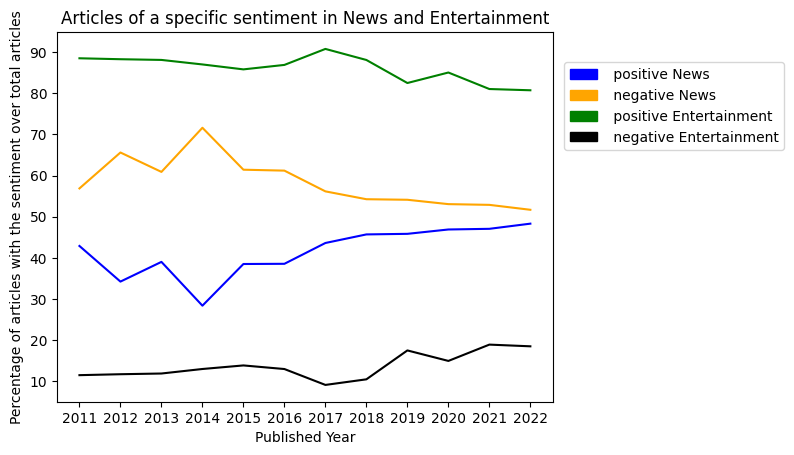

In [163]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


sentiment_colors = {'News': {'positive': 'blue', 'negative': 'orange'}, 'Entertainment': {'positive': 'green', 'negative': 'black'}}
categories = ['News', 'Entertainment']
patchList = []
for category in categories:
    for key in sentiment_colors[category]:
        data_key = mpatches.Patch(color=sentiment_colors[category][key], label=f" {key} {category}")
        patchList.append(data_key)

for category in categories: 
    subset_df = grouped_counts[grouped_counts.super_category == category]
    for sentiment in ['positive', 'negative']:
        subset = subset_df[(subset_df['nltk_vader_sentiment_type'] == sentiment)].sort_values('published_year')
        plt.plot(subset['published_year'], subset['counts_percentage'], label=sentiment, color=sentiment_colors[category][sentiment])


plt.legend(bbox_to_anchor = (1.48, 0.8), loc='center right', handles=patchList)
# Adding details
plt.title('Articles of a specific sentiment in News and Entertainment')
plt.xlabel('Published Year')
plt.ylabel('Percentage of articles with the sentiment over total articles')
# Show plot
plt.show()

In [167]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiments = sentiment_analysis(data)
for i, d in enumerate(data):
    print(d)
    print(sentiments[i])

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


The sky is blue
{'label': 'positive', 'score': 0.8123294711112976}
I love you
{'label': 'positive', 'score': 0.8594693541526794}
I hate you
{'label': 'negative', 'score': 0.7866930365562439}
The car is red
{'label': 'neutral', 'score': 0.7363644242286682}
The car is green
{'label': 'neutral', 'score': 0.6378827095031738}
This car drives really fast. It's awesome, and I love it
{'label': 'positive', 'score': 0.9869059920310974}
This car drives really slow, it's driving me crazy
{'label': 'negative', 'score': 0.9103400707244873}
Writing this in Java is way more verbose than in Python
{'label': 'neutral', 'score': 0.5221865773200989}
Java is terrible
{'label': 'negative', 'score': 0.8781055212020874}


In [168]:
data

['The sky is blue',
 'I love you',
 'I hate you',
 'The car is red',
 'The car is green',
 "This car drives really fast. It's awesome, and I love it",
 "This car drives really slow, it's driving me crazy",
 'Writing this in Java is way more verbose than in Python',
 'Java is terrible']

In [169]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="Cloudy1225/stackoverflow-roberta-base-sentiment")
sentiments = sentiment_analysis(data)
for i, d in enumerate(data):
    print(d)
    print(sentiments[i])

Device set to use mps:0


The sky is blue
{'label': 'neutral', 'score': 0.9479196071624756}
I love you
{'label': 'positive', 'score': 0.9995654225349426}
I hate you
{'label': 'negative', 'score': 0.9995493292808533}
The car is red
{'label': 'neutral', 'score': 0.9994834661483765}
The car is green
{'label': 'neutral', 'score': 0.9994649291038513}
This car drives really fast. It's awesome, and I love it
{'label': 'positive', 'score': 0.9996718168258667}
This car drives really slow, it's driving me crazy
{'label': 'negative', 'score': 0.9992045760154724}
Writing this in Java is way more verbose than in Python
{'label': 'neutral', 'score': 0.9994812607765198}
Java is terrible
{'label': 'negative', 'score': 0.9996222257614136}


In [170]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = ["The sky is blue",'I love you', 'I hate you', 'The car is red', 'The car is green', "This car drives really fast. It's awesome, and I love it", "This car drives really slow, it's driving me crazy", 'Writing this in Java is way more verbose than in Python', "Java is terrible"]
for d in data:
    print(d)
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(d)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

The sky is blue
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I love you
compound: 0.6369, neg: 0.0, neu: 0.192, pos: 0.808, 
I hate you
compound: -0.5719, neg: 0.787, neu: 0.213, pos: 0.0, 
The car is red
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The car is green
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This car drives really fast. It's awesome, and I love it
compound: 0.8612, neg: 0.0, neu: 0.483, pos: 0.517, 
This car drives really slow, it's driving me crazy
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
Writing this in Java is way more verbose than in Python
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Java is terrible
compound: -0.4767, neg: 0.608, neu: 0.392, pos: 0.0, 


In [138]:
subset_df.columns

Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text', 'published_year', 'super_category',
       'nltk_vader_sentiments'],
      dtype='object')

In [204]:
df.loc[25594]

Index                                                                     32354
Author                        Blathnaid Healy, James Masters and Eliza Macki...
Date published                                              2018-03-18 17:14:22
Category                                                                   news
Section                                                                  europe
Url                           https://www.cnn.com/2018/03/18/europe/live-upd...
Headline                              Live updates: Russian election 2018 - CNN
Description                   Russia's presidential election is widely expec...
Keywords                      europe, Live updates: Russian election 2018 - CNN
Second headline                             Live updates: Russian election 2018
Article text                                                                NaN
published_year                                                             2018
super_category                          

In [187]:
np.isnan(df.loc[25594]['Article text'])

True